# Analysis of the final catalogue of matched sources

We will analyse the changes in the classification using the new sigma and the new catalogue without the galaxies that went to LGZ

## Configuration

### Load libraries and setup

In [1]:
import numpy as np
from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output
import pickle
import os

In [2]:
from mltier1 import (get_center, Field, parallel_process, describe)

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from IPython.display import clear_output

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def most_common(a, n=2):
    u, c = np.unique(a, return_counts=True)
    order = np.argsort(c)
    for i in range(n):
        print(c[order][-(i+1)], u[order][-(i+1)])

### General configuration

In [8]:
save_intermediate = True
plot_intermediate = True

In [9]:
idp = "idata/final_analysis_pdf_v1.0"

In [10]:
if not os.path.isdir(idp):
    os.makedirs(idp)

## Load data

In [11]:
pwli = Table.read("lofar_pw_pdf.fits")

In [12]:
pwli.colnames

['Source_Name',
 'RA',
 'E_RA',
 'DEC',
 'E_DEC',
 'Peak_flux',
 'E_Peak_flux',
 'Total_flux',
 'E_Total_flux',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Isl_rms',
 'S_Code',
 'Mosaic_ID',
 'AllWISE',
 'objID',
 'ra',
 'dec',
 'raErr',
 'decErr',
 'W1mag',
 'W1magErr',
 'i',
 'iErr',
 'colour',
 'category',
 'lr',
 'lr_dist']

In [13]:
lofar_all = Table.read("data/LOFAR_HBA_T1_DR1_merge_ID_optical_v1.0.fits")

#### Join data tables

In [14]:
pwl = join(pwli, lofar_all[['Source_Name', 'AllWISE', 'objID', 'ML_LR', 
                            'ID_flag', 'ID_name', 'ID_ra', 'ID_dec', 
                            'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 'LGZ_Assoc', 
                            'LGZ_Assoc_Qual', 'LGZ_ID_Qual']], 
           join_type='left', 
           keys='Source_Name', 
           uniq_col_name='{col_name}{table_name}', 
           table_names=['', '_input'])

In [15]:
colour_limits = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0]

In [16]:
bin_list, centers, Q_0_colour, n_m, q_m = pickle.load(open("lofar_params.pckl", "rb"))

#### Explore and repair data

In [17]:
for col in pwl.colnames:
    fv = pwl[col].fill_value
    typ = pwl[col].dtype
    print(col, fv, typ)
    # Restore NaNs
    if fv == 1e+20:
        pwl[col][(pwl[col] == fv)] = np.nan
#     if (isinstance(fv, np.float64) and (fv != 1e+20)):
#         print(col, fv)
#         pwl[col].fill_value = 1e+20

Source_Name N/A <U22
RA 1e+20 >f8
E_RA 1e+20 >f8
DEC 1e+20 >f8
E_DEC 1e+20 >f8
Peak_flux 1e+20 >f8
E_Peak_flux 1e+20 >f8
Total_flux 1e+20 >f8
E_Total_flux 1e+20 >f8
Maj 1e+20 >f8
E_Maj 1e+20 >f8
Min 1e+20 >f8
E_Min 1e+20 >f8
PA 1e+20 >f8
E_PA 1e+20 >f8
Isl_rms 1e+20 >f8
S_Code N/A <U1
Mosaic_ID N/A <U11
AllWISE N/A <U19
objID 999999 >i8
ra 1e+20 >f8
dec 1e+20 >f8
raErr 1e+20 >f8
decErr 1e+20 >f8
W1mag 1e+20 >f8
W1magErr 1e+20 >f8
i 1e+20 >f8
iErr 1e+20 >f8
colour 1e+20 >f8
category 1e+20 >f8
lr 1e+20 >f8
lr_dist 1e+20 >f8
AllWISE_input N/A <U19
objID_input 999999 >i8
ML_LR 1e+20 >f8
ID_flag 999999 >i8
ID_name N/A <U27
ID_ra 1e+20 >f8
ID_dec 1e+20 >f8
LGZ_Size 1e+20 >f8
LGZ_Width 1e+20 >f8
LGZ_PA 1e+20 >f8
LGZ_Assoc 1e+20 >f8
LGZ_Assoc_Qual 1e+20 >f8
LGZ_ID_Qual 1e+20 >f8


In [18]:
pwl["colour"][(pwl["colour"] == 1e+20)] = np.nan

In [19]:
describe(pwl["colour"])

2.128 +/- 0.814; median: 2.068; limits: [-1.640, 9.281]; N=318771 (172386 NaN; 0 masked)


/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4147: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  part.partition(kth)


Change the AllWISE_input that are '' to 'N/A'. That comes from a previous error with the fill value.

In [20]:
pwl["AllWISE_input"][pwl["AllWISE_input"] == ""] = "N/A"

## Plots for the paper

### q(m) over n(m) depending on the colour (not used)

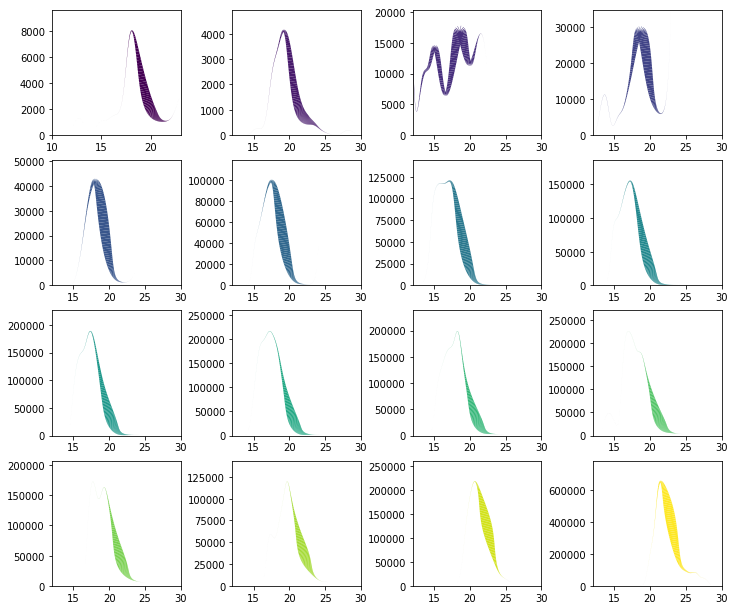

In [21]:
plt.rcParams["figure.figsize"] = (12,10)

from matplotlib import cm
from matplotlib.collections import LineCollection

cm_subsection = linspace(0., 1., 16) 
colors = [ cm.viridis(x) for x in cm_subsection ]

low = np.nonzero(centers[1] >= 15)[0][0]
high = np.nonzero(centers[1] >= 22.2)[0][0]

fig, a = plt.subplots()

for i, q_m_k in enumerate(q_m):
    #plot(centers[i], q_m_old[i]/n_m_old[i])
    a = subplot(4,4,i+1)
    if i not in [-1]:
        q_m_aux = q_m[i]/np.sum(q_m[i])
        lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float) 
        #print(lwidths)
        
        y_aux = q_m_k/n_m[i]
        factor = np.max(y_aux[low:high])
        y = y_aux
        #print(y)
        x = centers[i]
        
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, linewidths=lwidths, color=colors[i])
        
        a.add_collection(lc)
        
        #plot(centers[i], x/factor, color=colors[i-1])
        xlim([12, 30])
        if i == 0:
            xlim([10, 23])
        ylim([0, 1.2*factor])

subplots_adjust(left=0.125, 
                bottom=0.1, 
                right=0.9, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)

Explanation of the KDE used in the computing of the q(m) and n(m):
* https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

### Figure 3 of the paper

Help from:
* https://stackoverflow.com/questions/19877666/add-legends-to-linecollection-plot
* https://matplotlib.org/users/mathtext.html#mathtext-tutorial

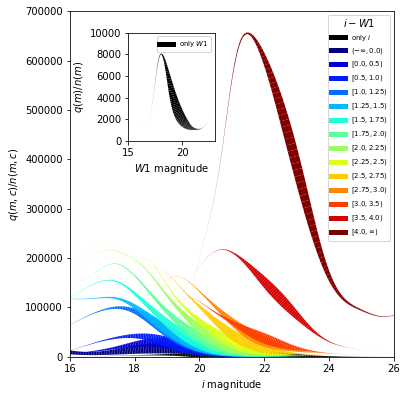

In [22]:
save = False
save_pdf = True

plt.rcParams["figure.figsize"] = (6, 6)

from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

cm_subsection = linspace(0., 1., 16) 
colors = [ cm.viridis(x) for x in cm_subsection ]

low = np.nonzero(centers[1] >= 15)[0][0]
high = np.nonzero(centers[1] >= 22.2)[0][0]

cm_subsection = linspace(0., 1., 14) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig, a = plt.subplots()
lcs = []
proxies = []

def make_proxy(zvalue, scalar_mappable, **kwargs):
    color = scalar_mappable.cmap(scalar_mappable.norm(zvalue))
    return Line2D([0, 1], [0, 1], color=color, **kwargs)

for i, q_m_k in enumerate(q_m):
    #plot(centers[i], q_m_old[i]/n_m_old[i])
    q_m_aux = q_m[i]/np.sum(q_m[i])
    lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float)
    if save_pdf and (i<6): # Solve problems with the line with in pdfs
        lwidths[lwidths < 0.005] = 0
    #print(lwidths)

    y_aux = q_m_k/n_m[i]
    factor = np.max(y_aux[low:high])
    y = y_aux
    #print(y)
    x = centers[i]

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    #lc = LineCollection(segments, linewidths=lwidths, color=colors[i])
    
    if i not in [0]:  
        if i == 1:
            color = "k"
        else:
            color = colors[i-2]
            
        lcs.append(LineCollection(segments, linewidths=lwidths, color=color))
        proxies.append(Line2D([0, 1], [0, 1], color=color, lw=5))
        
        a.add_collection(lcs[-1])
        xlim([16, 26])
        ylim([0, 700000])
        xlabel("$i$ magnitude")
        ylabel("$q(m,c)/n(m,c)$")

        
        
inset = plt.axes([0.285, 0.6, .2, .25])
q_m_aux = q_m[0]/np.sum(q_m[0])
lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float)
y_aux = q_m[0]/n_m[0]
factor = np.max(y_aux[low:high])
y = y_aux
x = centers[0]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, linewidths=lwidths, color="k")
proxy = Line2D([0, 1], [0, 1], color="k", lw=5)
inset.add_collection(lc)
xlim([15, 23])
ylim([0, 10000])
xlabel("$W1$ magnitude")
ylabel("$q(m)/n(m)$")
inset.legend([proxy], ["only $W1$"], fontsize="x-small")
        

    #ylim([0, 1.2*factor])
        
#print(lcs)

# a.legend(proxies, ["$i-W1 < 0.0$", 
#              "$0.0 \leq i-W1 < 0.5$", 
#              "$0.5 \leq i-W1 < 1.0$", 
#              "$1.0 \leq i-W1 < 1.25$", 
#              "$1.25 \leq i-W1 < 1.5$", 
#              "$1.5 \leq i-W1 < 1.75$", 
#              "$1.75 \leq i-W1 < 2.0$", 
#              "$2.0 \leq i-W1 < 2.25$",
#              "$2.25 \leq i-W1 < 2.5$",
#              "$2.5 \leq i-W1 < 2.75$",
#              "$2.75 \leq i-W1 < 3.0$",
#              "$3.0 \leq i-W1 < 3.5$",
#              "$3.5 \leq i-W1 < 4.0$",
#              "$i-W1 \geq 4.0$"])

# a.legend(proxies, ["only $i$",
#                    "$i-W1 \in (-\infty, 0.0)$", 
#                    "$i-W1 \in [0.0, 0.5)$",
#                    "$i-W1 \in [0.5, 1.0)$",
#                    "$i-W1 \in [1.0, 1.25)$",
#                    "$i-W1 \in [1.25, 1.5)$",
#                    "$i-W1 \in [1.5, 1.75)$",
#                    "$i-W1 \in [1.75, 2.0)$",
#                    "$i-W1 \in [2.0, 2.25)$",
#                    "$i-W1 \in [2.25, 2.5)$",
#                    "$i-W1 \in [2.5, 2.75)$",
#                    "$i-W1 \in [2.75, 3.0)$",
#                    "$i-W1 \in [3.0, 3.5)$",
#                    "$i-W1 \in [3.5, 4.0)$",
#                    "$i-W1 \in [4.0, \infty)$"],
#         fontsize="xx-small")

a.legend(proxies, ["only $i$",
                   "$(-\infty, 0.0)$", 
                   "$[0.0, 0.5)$",
                   "$[0.5, 1.0)$",
                   "$[1.0, 1.25)$",
                   "$[1.25, 1.5)$",
                   "$[1.5, 1.75)$",
                   "$[1.75, 2.0)$",
                   "$[2.0, 2.25)$",
                   "$[2.25, 2.5)$",
                   "$[2.5, 2.75)$",
                   "$[2.75, 3.0)$",
                   "$[3.0, 3.5)$",
                   "$[3.5, 4.0)$",
                   "$[4.0, \infty)$"],
        fontsize="x-small",
        title="$i-W1$")

subplots_adjust(left=0.15, 
                bottom=0.1, 
                right=0.9, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)

if save:
    plt.savefig("idata/q_n_m.png")
    plt.savefig("idata/q_n_m.svg")
    plt.savefig("idata/q_n_m_high.png", dpi=800)
if save_pdf:
    plt.savefig("idata/q_n_m.pdf")

### Figure 4 of the paper: completeness and reliability

In [23]:
q0 = np.sum(Q_0_colour)

In [24]:
def completeness(lr, threshold, q0):
    n = len(lr)
    lrt = lr[lr < threshold]
    return 1. - np.sum((q0 * lrt)/(q0 * lrt + (1 - q0)))/float(n)/q0

def reliability(lr, threshold, q0):
    n = len(lr)
    lrt = lr[lr > threshold]
    return 1. - np.sum((1. - q0)/(q0 * lrt + (1 - q0)))/float(n)/q0

completeness_v = np.vectorize(completeness, excluded=[0])
reliability_v = np.vectorize(reliability, excluded=[0])

In [25]:
pwl["lrt"] = pwl["lr"]
pwl["lrt"][np.isnan(pwl["lr"])] = 0

In [26]:
n_test = 100
threshold_mean = np.percentile(pwl["lrt"], 100*(1 - q0))

In [27]:
thresholds = np.arange(0., 10., 0.01)
thresholds_fine = np.arange(0.1, 2., 0.001)
completeness_t = completeness_v(pwl["lrt"], thresholds, q0)
reliability_t = reliability_v(pwl["lrt"], thresholds, q0)
average_t = (completeness_t + reliability_t)/2

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2834: UserWarning: Warning: converting a masked element to nan.
  res = array(outputs, copy=False, subok=True, dtype=otypes[0])


In [28]:
completeness_t_fine = completeness_v(pwl["lrt"], thresholds_fine, q0)
reliability_t_fine = reliability_v(pwl["lrt"], thresholds_fine, q0)
average_t_fine = (completeness_t_fine + reliability_t_fine)/2

In [29]:
thresholds_fine[np.argmax(average_t_fine)]

0.3580000000000002

In [30]:
thresholds_fine[np.argmin(np.abs(completeness_t_fine-reliability_t_fine))]

0.6390000000000005

In [31]:
np.sum(pwl["lrt"] >= 0.358)

226627

In [32]:
np.sum(pwl["lrt"] >= 0.639)

225018

In [39]:
np.sum(pwl["lrt"] >= 0.639)/len(pwl)

0.7058923176825997

In [33]:
threshold_sel = 0.639

In [34]:
thresholds_fine = np.arange(0.0, 2., 0.001)
completeness_t_fine = completeness_v(pwl["lrt"], thresholds_fine, q0)
reliability_t_fine = reliability_v(pwl["lrt"], thresholds_fine, q0)

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2834: UserWarning: Warning: converting a masked element to nan.
  res = array(outputs, copy=False, subok=True, dtype=otypes[0])


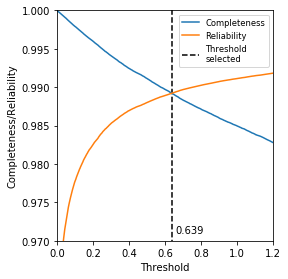

In [40]:
plt.rcParams["figure.figsize"] = (4, 4)

plot(thresholds_fine, completeness_t_fine, "-", label="Completeness")
plot(thresholds_fine, reliability_t_fine, "-", label="Reliability")
text(0.66, 0.971, "0.639")
#plot(thresholds_fine, average_t_fine, "-", label="average")
vlines(threshold_sel, 0.9, 1., "k", linestyles="dashed", label="Threshold\nselected")
#vlines(threshold_mean, 0.9, 1., "y", linestyles="dashed")
ylim([0.97, 1.])
xlim([0.0, 1.2])
legend(fontsize="small")
xlabel("Threshold")
ylabel("Completeness/Reliability")

subplots_adjust(left=0.2, 
                bottom=0.1, 
                right=0.95, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)

save = True
if save:
    plt.savefig("idata/completeness_reliability.png")
    plt.savefig("idata/completeness_reliability.svg")
    plt.savefig("idata/completeness_reliability.pdf")
    plt.savefig("idata/completeness_reliability_high.png", dpi=800)

### N_LOFAR

In [41]:
cond_mlr = (pwl['ID_flag'] == 1)

In [42]:
len(pwl)

318771

In [43]:
np.sum(np.isnan(pwl["category"]))

92144

In [44]:
np.sum(np.isnan(pwl["category"][cond_mlr]))

78011

In [45]:
n_c, n_c_mlr = [], []
for i in np.unique(pwl["category"][~np.isnan(pwl["category"])]):
    n_c.append(np.sum((pwl["category"] == i)))
    n_c_mlr.append(np.sum((pwl["category"][cond_mlr] == i)))
    print(i, n_c[-1], n_c_mlr[-1])

0.0 67241 66205
1.0 13001 12240
2.0 358 343
3.0 1754 1717
4.0 7076 6928
5.0 9692 9485
6.0 15021 14698
7.0 17437 17030
8.0 17334 16934
9.0 16266 15923
10.0 15046 14741
11.0 13090 12856
12.0 11203 10996
13.0 14636 14373
14.0 5569 5454
15.0 1903 1859


In [46]:
total_n_c = np.sum(n_c)
total_n_c_mlr = np.sum(n_c_mlr)
print(total_n_c, total_n_c_mlr)
print(len(pwl)-np.sum(np.isnan(pwl["category"])), len(pwl)-np.sum(np.isnan(pwl["category"][cond_mlr])))
for i in range(16):
    print("{:2d} {:6d} {:6d} {:6.3f} {:6.3f} {:.2%}".format(i, 
                                                     n_c[i], 
                                                     n_c_mlr[i],
                                                     n_c[i]/total_n_c*100, 
                                                     n_c_mlr[i]/total_n_c_mlr*100,
                                                     (n_c[i]-n_c_mlr[i])/n_c[i]
         ))

226627 221782
226627 240760
 0  67241  66205 29.670 29.851 1.54%
 1  13001  12240  5.737  5.519 5.85%
 2    358    343  0.158  0.155 4.19%
 3   1754   1717  0.774  0.774 2.11%
 4   7076   6928  3.122  3.124 2.09%
 5   9692   9485  4.277  4.277 2.14%
 6  15021  14698  6.628  6.627 2.15%
 7  17437  17030  7.694  7.679 2.33%
 8  17334  16934  7.649  7.635 2.31%
 9  16266  15923  7.177  7.180 2.11%
10  15046  14741  6.639  6.647 2.03%
11  13090  12856  5.776  5.797 1.79%
12  11203  10996  4.943  4.958 1.85%
13  14636  14373  6.458  6.481 1.80%
14   5569   5454  2.457  2.459 2.07%
15   1903   1859  0.840  0.838 2.31%


In [47]:
total_n_c

226627

### Fractions

Load the full catalogue of galaxies and work out the fraction of matched LOFAR. It will be necessary to work in the restricted area with both the pw and the lofar matched catalogue.
The fractions could be corrected if the relative fractions of sources of each type change between the full area and the restricted area for the LOFAR matches.

In [48]:
field = Field(170.0, 190.0, 46.8, 55.9)

In [49]:
combined = Table.read("pw.fits")

In [50]:
combined = field.filter_catalogue(combined, 
                               colnames=("ra", "dec"))

In [51]:
combined["colour"] = combined["i"] - combined["W1mag"]

In [52]:
colour_limits = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0]

In [53]:
combined_panstarrs = (~np.isnan(combined["i"]) & np.isnan(combined["W1mag"])) # Sources with only i-band
combined_wise =(np.isnan(combined["i"]) & ~np.isnan(combined["W1mag"])) # Sources with only W1-band

In [54]:
# Start with the W1-only, i-only and "less than lower colour" bins
colour_bin_def = [{"name":"only W1", "condition": combined_wise},
                  {"name":"only i", "condition": combined_panstarrs},
                  {"name":"-inf to {}".format(colour_limits[0]), 
                   "condition": (combined["colour"] < colour_limits[0])}]

# Get the colour bins
for i in range(len(colour_limits)-1):
    name = "{} to {}".format(colour_limits[i], colour_limits[i+1])
    condition = ((combined["colour"] >= colour_limits[i]) & 
                 (combined["colour"] < colour_limits[i+1]))
    colour_bin_def.append({"name":name, "condition":condition})

# Add the "more than higher colour" bin
colour_bin_def.append({"name":"{} to inf".format(colour_limits[-1]), 
                       "condition": (combined["colour"] >= colour_limits[-1])})

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


In [55]:
combined["category"] = np.nan
for i in range(len(colour_bin_def)):
    combined["category"][colour_bin_def[i]["condition"]] = i

In [56]:
numbers_combined_bins = np.array([np.sum(a["condition"]) for a in colour_bin_def])

In [57]:
numbers_combined_bins

array([ 669839, 1778426,  123221,   86953,  127155,   91489,  106076,
        112638,  109949,   98183,   81055,   61913,   44390,   46507,
         14347,    5536])

In [58]:
pwlf = field.filter_catalogue(pwl[cond_mlr], 
                               colnames=("ra", "dec"))

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


In [59]:
pwlf_all = field.filter_catalogue(pwl, 
                               colnames=("ra", "dec"))

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


In [60]:
lofar_c, pw_c, lofar_c_all = [], [], []
avg_colour = []
for i in range(16):
    lofar_c.append(np.sum(pwlf["category"] == i))
    lofar_c_all.append(np.sum(pwlf_all["category"] == i))
    pw_c.append(np.sum(combined["category"] == i))
    avg_colour.append(np.nanmedian(combined["colour"][combined["category"] == i]))
    print("{:2d} {:6.2f} {:6d} {:7d} {:6.3f} +/- {:6.3f}".format(i, avg_colour[-1],
                                                                 lofar_c_all[-1], pw_c[-1], 
                                             lofar_c_all[-1]/pw_c[-1], np.sqrt(lofar_c_all[-1])/pw_c[-1]))
    #print("{:2d} {:6d} {:7d} {:5.3f}".format(i, lofar_c[-1], pw_c[-1], lofar_c[-1]/pw_c[-1]))

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


 0    nan  20066  669839  0.030 +/-  0.000
 1    nan   4091 1778426  0.002 +/-  0.000
 2  -0.66    101  123221  0.001 +/-  0.000
 3   0.26    543   86953  0.006 +/-  0.000
 4   0.78   2358  127155  0.019 +/-  0.000
 5   1.13   3351   91489  0.037 +/-  0.001
 6   1.38   4803  106076  0.045 +/-  0.001
 7   1.63   5375  112638  0.048 +/-  0.001
 8   1.87   5174  109949  0.047 +/-  0.001
 9   2.12   4659   98183  0.047 +/-  0.001
10   2.37   4485   81055  0.055 +/-  0.001
11   2.62   3915   61913  0.063 +/-  0.001
12   2.86   3382   44390  0.076 +/-  0.001
13   3.19   4501   46507  0.097 +/-  0.001
14   3.67   1715   14347  0.120 +/-  0.003
15   4.31    555    5536  0.100 +/-  0.004


In [61]:
np.sum(np.array(lofar_c_all)/np.array(pw_c))

0.7933275842582065

In [62]:
np.sum(np.array(lofar_c_all))/np.sum(np.array(pw_c))

0.019415478133624833

In [63]:
len(pwl)/len(combined)

0.08960083245284356

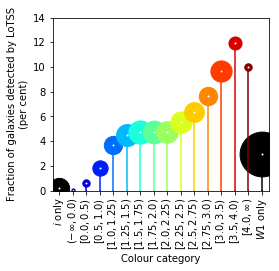

In [66]:
lc = np.array(lofar_c_all)
pc = np.array(pw_c)

plt.rcParams["figure.figsize"] = (4, 4)

cm_subsection = linspace(0., 1., 14) 
colors = [ cm.jet(x) for x in cm_subsection ]

# i-only
plot([0,0], [0,lc[1]/pc[1]*100], marker=",", ls="-", color="k")
scatter([0], lc[1]/pc[1]*100, s=lc[1]/10, c="k")
plot([0], lc[1]/pc[1]*100, marker=".", ls="", color="w", ms=2)

# w1-only
plot([15,15], [0,lc[0]/pc[0]*100], marker=",", ls="-", color="k")
scatter([15], lc[0]/pc[0]*100, s=lc[0]/10, c="k")
plot([15], lc[0]/pc[0]*100, marker=".", ls="", color="w", ms=2)

# colours
for i in range(14):
    plot([i+1,i+1], [0,lc[i+2]/pc[i+2]*100], marker=",", ls="-", color=colors[i])
    scatter([i+1], lc[i+2]/pc[i+2]*100, s=lc[i+2]/10, c=colors[i])
    if i == 0:
        plot([i+1], lc[i+2]/pc[i+2]*100, marker=".", ls="", color="w", ms=1)
    else:
        plot([i+1], lc[i+2]/pc[i+2]*100, marker=".", ls="", color="w", ms=2)

#text(0.66, 0.971, "0.639")
ylim([0., 14.])
xlim([-0.5, 15.5])
#legend(fontsize="small")
xlabel("Colour category")
ylabel("Fraction of galaxies detected by LoTSS\n(per cent)")


xt = ["$i$ only",
       "$(-\infty, 0.0)$", 
       "$[0.0, 0.5)$",
       "$[0.5, 1.0)$",
       "$[1.0, 1.25)$",
       "$[1.25, 1.5)$",
       "$[1.5, 1.75)$",
       "$[1.75, 2.0)$",
       "$[2.0, 2.25)$",
       "$[2.25, 2.5)$",
       "$[2.5, 2.75)$",
       "$[2.75, 3.0)$",
       "$[3.0, 3.5)$",
       "$[3.5, 4.0)$",
       "$[4.0, \infty)$", 
     "$W1$ only"]
xticks(np.arange(16), xt, rotation=90)

subplots_adjust(left=0.2, 
                bottom=0.3, 
                right=0.95, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)

save = True
if save:
    plt.savefig("idata/fractiono.png")
    plt.savefig("idata/fractiono.svg")
    plt.savefig("idata/fractiono.pdf")
    plt.savefig("idata/fractiono_high.png", dpi=800)

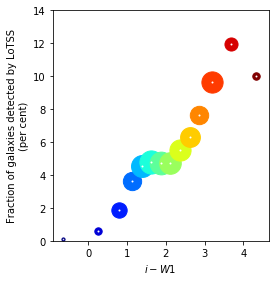

In [67]:
plt.rcParams["figure.figsize"] = (4, 4)

cm_subsection = linspace(0., 1., 14) 
colors = [ cm.jet(x) for x in cm_subsection ]

# # i-only
# plot([0,0], [0,lc[1]/pc[1]*100], marker=",", ls="-", color="k")
# scatter([0], lc[1]/pc[1]*100, s=lc[1]/10, c="k")
# plot([0], lc[1]/pc[1]*100, marker=".", ls="", color="w", ms=2)

# # w1-only
# plot([15,15], [0,lc[0]/pc[0]*100], marker=",", ls="-", color="k")
# scatter([15], lc[0]/pc[0]*100, s=lc[0]/10, c="k")
# plot([15], lc[0]/pc[0]*100, marker=".", ls="", color="w", ms=2)

# colours
for i in range(14):
    #plot([avg_colour[i+2],avg_colour[i+2]], [0,lc[i+2]/pc[i+2]*100], marker=",", ls="-", color=colors[i])
    scatter(avg_colour[i+2], lc[i+2]/pc[i+2]*100, s=lc[i+2]/10, c=colors[i])
    if i == 0:
        plot(avg_colour[i+2], lc[i+2]/pc[i+2]*100, marker=".", ls="", color="w", ms=1)
    else:
        plot(avg_colour[i+2], lc[i+2]/pc[i+2]*100, marker=".", ls="", color="w", ms=2)

#text(0.66, 0.971, "0.639")
ylim([0., 14.])
#xlim([-0.5, 13.5])
#legend(fontsize="small")
xlabel("$i-W1$")
ylabel("Fraction of galaxies detected by LoTSS\n(per cent)")


# xt = ["$(-\infty, 0.0)$", 
#        "$[0.0, 0.5)$",
#        "$[0.5, 1.0)$",
#        "$[1.0, 1.25)$",
#        "$[1.25, 1.5)$",
#        "$[1.5, 1.75)$",
#        "$[1.75, 2.0)$",
#        "$[2.0, 2.25)$",
#        "$[2.25, 2.5)$",
#        "$[2.5, 2.75)$",
#        "$[2.75, 3.0)$",
#        "$[3.0, 3.5)$",
#        "$[3.5, 4.0)$",
#        "$[4.0, \infty)$"]
# xticks(np.arange(14), xt, rotation=90)

subplots_adjust(left=0.2, 
                bottom=0.1, 
                right=0.95, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)

save = True
if save:
    plt.savefig("idata/fraction.png")
    plt.savefig("idata/fraction.svg")
    plt.savefig("idata/fraction.pdf")
    plt.savefig("idata/fraction_high.png", dpi=800)

### Create the additional columns for the types of matches

In [45]:
threshold_sel = 0.639

In [46]:
cond_mlr = (pwl['ID_flag'] == 1) & (pwl['Maj'] < 30.)

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [47]:
pwlaux = pwl[cond_mlr].filled()

Matched sources

In [48]:
pwlaux_match = pwlaux[~np.isnan(pwlaux['ML_LR'])]

In [49]:
len(pwlaux_match)

218600

In [50]:
cond_match = (
    ~np.isnan(pwlaux_match['lr']) &
    (pwlaux_match['lr'] >= threshold_sel) &
    (
        (pwlaux_match["AllWISE_input"] != "N/A") |
         ~np.isnan(pwlaux_match['objID_input'])
    ) &
    (
        ( 
            (pwlaux_match["AllWISE"] == pwlaux_match["AllWISE_input"]) &
            (pwlaux_match["objID"] == pwlaux_match["objID_input"]) &
            ~np.isnan(pwlaux_match["objID"]) &
            (pwlaux_match["AllWISE"] != "N/A")
        ) |
        ( 
            (pwlaux_match["AllWISE"] == pwlaux_match["AllWISE_input"]) &
            np.isnan(pwlaux_match["objID"])
        ) |
        ( 
            (pwlaux_match["AllWISE"] == "N/A") &
            (pwlaux_match["objID"] == pwlaux_match["objID_input"])
        )
    )
        
)
m_m = np.sum(cond_match)
print(m_m)

216970


In [51]:
cond_diffmatch = (
    ~np.isnan(pwlaux_match['lr']) &
    (pwlaux_match['lr'] >= threshold_sel) &
    (
        (pwlaux_match["AllWISE_input"] != "N/A") |
         ~np.isnan(pwlaux_match['objID_input'])
    ) &
    (
        ( 
            (pwlaux_match["AllWISE"] != pwlaux_match["AllWISE_input"]) |
            (pwlaux_match["objID"] != pwlaux_match["objID_input"])
        ) 
    )

)
m_dm = np.sum(cond_diffmatch)
print(m_dm)

509


In [52]:
cond_nomatch = (
    np.isnan(pwlaux_match['lr']) |
    (pwlaux_match['lr'] < threshold_sel)
)
m_nm = np.sum(cond_nomatch)
print(m_nm)

1124


In [53]:
m_nm + m_dm + m_m

218603

In [54]:
217070+512+1021

218603

Non-matched sources

In [55]:
pwlaux_nomatch = pwlaux[np.isnan(pwlaux['ML_LR'])]

In [56]:
len(pwlaux_nomatch)

81522

In [57]:
cond2_match = (
    ~np.isnan(pwlaux_nomatch['lr']) &
    (pwlaux_nomatch['lr'] >= threshold_sel)   
)
m2_m = np.sum(cond2_match)
print(m2_m)

2904


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, oper)(other)


In [58]:
cond2_nomatch = (
    np.isnan(pwlaux_nomatch['lr']) |
    (pwlaux_nomatch['lr'] < threshold_sel)
)
m2_nm = np.sum(cond2_nomatch)
print(m2_nm)

78618


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [38]:
m2_nm + m2_m

81522

In [39]:
m2_nm + m2_m + m_nm + m_dm + m_m

300125

Diagnostic columns

In [40]:
pwl['match_code'] = 0

In [41]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_diffmatch]["Source_Name"])] = 2

In [42]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_match]["Source_Name"])]=1

In [43]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_nomatch]["Source_Name"])] = 3

In [44]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & np.isnan(pwl['ML_LR'])][cond2_match]["Source_Name"])] = 4

In [45]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & np.isnan(pwl['ML_LR'])][cond2_nomatch]["Source_Name"])] = 5

In [46]:
for i in range(6):
    print(i, np.sum(pwl['match_code'] == i))

0 18649
1 217070
2 509
3 1021
4 4316
5 77206


### Study the 3 repeated sources

3 sources that are in group 1 and 2

In [47]:
pwl['match_code2'] = 0
pwl['match_code2'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_match]["Source_Name"])]=1

In [48]:
t = pwl[np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_diffmatch]["Source_Name"])]
t[t['match_code2'] != 0][['Source_Name', "AllWISE", "AllWISE_input", "objID", "objID_input"]]

Source_Name,AllWISE,AllWISE_input,objID,objID_input
str88,str19,str19,int64,int64
ILTJ105150.16+472306.9,N/A,J105150.11+472306.4,164861629587942860,164861629587942860
ILTJ124446.75+545233.0,N/A,J124446.79+545232.8,173851911952891597,173851911952891597
ILTJ131700.45+490748.4,N/A,J131700.38+490748.1,166951992516796699,166951992516796699


In [49]:
pwl[pwl["objID"] == 164861629587942860]

Source_Name,RA,E_RA,DEC,E_DEC,Peak_flux,E_Peak_flux,Total_flux,E_Total_flux,Maj,E_Maj,Min,E_Min,PA,E_PA,Isl_rms,S_Code,Mosaic_ID,AllWISE,objID,ra,dec,raErr,decErr,W1mag,W1magErr,i,iErr,colour,category,lr,lr_dist,AllWISE_input,objID_input,ML_LR,ID_flag,ID_name,ID_ra,ID_dec,LGZ_Size,LGZ_Width,LGZ_PA,LGZ_Assoc,LGZ_Assoc_Qual,LGZ_ID_Qual,match_code,match_code2
str88,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,int64,str27,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
ILTJ105150.16+472306.9,162.958997743,0.144574540402,47.3852535063,0.135700150377,1.0400645428,0.0620059670136,0.88200388277,0.113680644158,5.65331936162,0.345452470339,5.40066860218,0.314129798109,113.261924388,53.196333999,0.0649695139145,S,P3Hetdex16,N/A,164861629587942860,162.95880637,47.38512028,0.0451599992812,0.0261400006711,nan,nan,18.5082593446,0.0200500003994,nan,1.0,67.0586944523,0.669040319887,J105150.11+472306.4,164861629587942860,7.67859626092,1,PSO J105150.107+472306.380,162.95880637,47.38512028,nan,nan,nan,nan,nan,nan,1,1


## Analyse changes in the matches

In [50]:
most_common(pwl["AllWISE_input"].filled(), n=10)

102267 N/A
4 J132633.11+484745.9
2 J132959.54+471558.1
2 J140250.06+491021.4
2 J113321.11+470145.2
2 J113234.86+530404.6
2 J114607.72+472940.5
2 J120601.09+472843.3
2 J150913.19+523142.4
2 J120534.28+503221.7


Save data for tests

In [51]:
np.sum(~np.isnan(pwl["colour"]) & (pwl["match_code"] == 3))

0

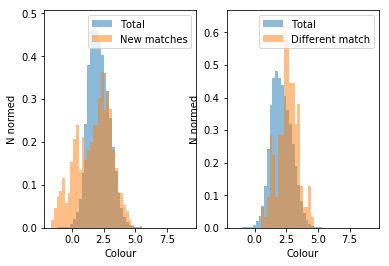

In [52]:
subplot(1,2,1)
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] != 0)], 
                    bins=50, normed=True, alpha=0.5, label="Total")
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] == 4)], 
                    bins=bins, normed=True, alpha=0.5, label="New matches")
xlabel("Colour")
ylabel("N normed")
legend()
subplot(1,2,2)
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] != 0)], 
                    bins=bins, normed=True, alpha=0.5, label="Total")
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] == 2)], 
                    bins=bins, normed=True, alpha=0.5, label="Different match")
xlabel("Colour")
ylabel("N normed")
legend()

## Additional description of the data

In [69]:
describe(pwlaux['ML_LR'])

513.417 +/- 678.597; median: 249.663; limits: [1.291, 5209.663]; N=300623 (81490 NaN; 0 masked)


In [70]:
describe(pwlaux['lr'])

559.391 +/- 1009.254; median: 137.720; limits: [0.000, 10404.787]; N=300623 (12224 NaN; 0 masked)


In [71]:
len(pwlaux)

300623

In [72]:
np.sum(
    (pwlaux["AllWISE"] != pwlaux["AllWISE_input"]) |
    (pwlaux["objID"] != pwlaux["objID_input"])  
      )

6019

In [73]:
np.sum(
    (pwlaux["AllWISE"] != pwlaux["AllWISE_input"]) &
    (pwlaux["objID"] != pwlaux["objID_input"])  
      )

2551

In [74]:
np.sum(
    (pwl[cond_mlr].filled()["AllWISE"] != pwl[cond_mlr]["AllWISE_input"]) &
    (pwl[cond_mlr].filled()["objID"] == pwl[cond_mlr]["objID_input"])  
      )

96

In [75]:
np.sum(
    (pwl[cond_mlr].filled()["AllWISE"] == pwl[cond_mlr]["AllWISE_input"]) &
    (pwl[cond_mlr].filled()["objID"] != pwl[cond_mlr]["objID_input"])  
      )

212

In [76]:
for i in ["AllWISE", "AllWISE_input", "objID", "objID_input"]:
    print(i)
    most_common(pwl[cond_mlr][i].filled(), n=3)

AllWISE
90589 N/A
2 J114351.84+534758.6
2 J121406.39+462302.4
AllWISE_input
92739 N/A
1 J121404.24+554324.9
1 J121404.58+541509.0
objID
144664 999999
2 163352016837856893
2 163971633340322080
objID_input
146362 999999
1 167041976433181499
1 167041974666874572


In [77]:
Q_0_colour

array([ 0.21493265,  0.04089325,  0.001     ,  0.00569206,  0.02510625,
        0.03587855,  0.0513815 ,  0.05742317,  0.05541292,  0.05003769,
        0.04789634,  0.04209503,  0.03628279,  0.04824595,  0.01839814,
        0.00593242])

In [78]:
np.sum(Q_0_colour)

0.73660870087729835